<a href="https://colab.research.google.com/github/nurcanyaz/deep_learning/blob/main/ANN_UYGULAMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Yapay Sinir Ağları(ANN) ile Rakam Tanıma

In [ ]:
from os import spawnl
# İmport library

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
import numpy as np

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
filterwarnings("ignore")

In [ ]:
# Mnist veri setinin yüklenmesi

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print("Eğitim setinin boyutu:", x_train.shape, y_train.shape)

Eğitim setinin boyutu: (60000, 28, 28) (60000,)


In [ ]:
print("Test setinin boyutu:", x_test.shape, y_test.shape)

Test setinin boyutu: (10000, 28, 28) (10000,)


In [ ]:
num_labels = len(np.unique(y_train))

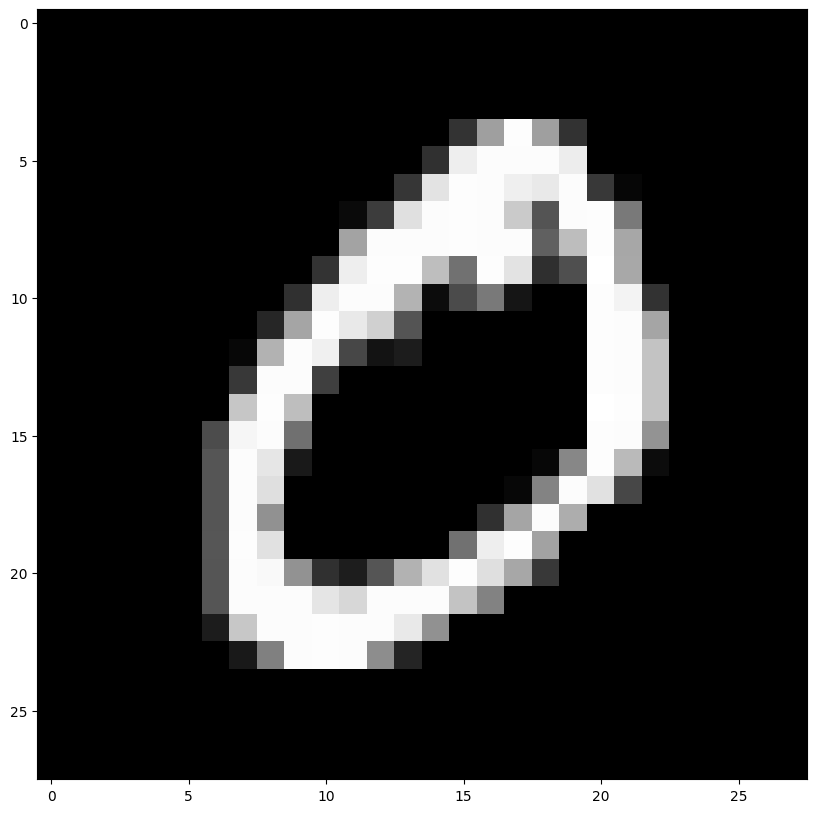

In [ ]:
# Veri setinden tek veri getirme

plt.figure(figsize=(10,10))
plt.imshow(x_train[1], cmap='gray');

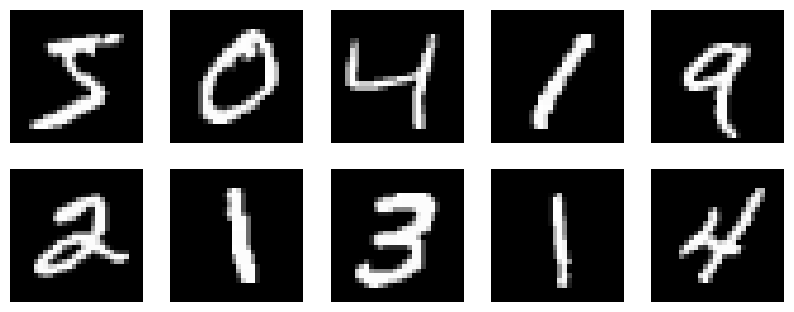

In [ ]:
# Veri setinden 10 adet veri getirilmesi
def visualize_img(data):
  plt.figure(figsize=(10,10))
  for n in range(10):
    ax = plt.subplot(5,5,n+1)
    plt.imshow(x_train[n], cmap='gray')
    plt.axis('off')

visualize_img(x_train)

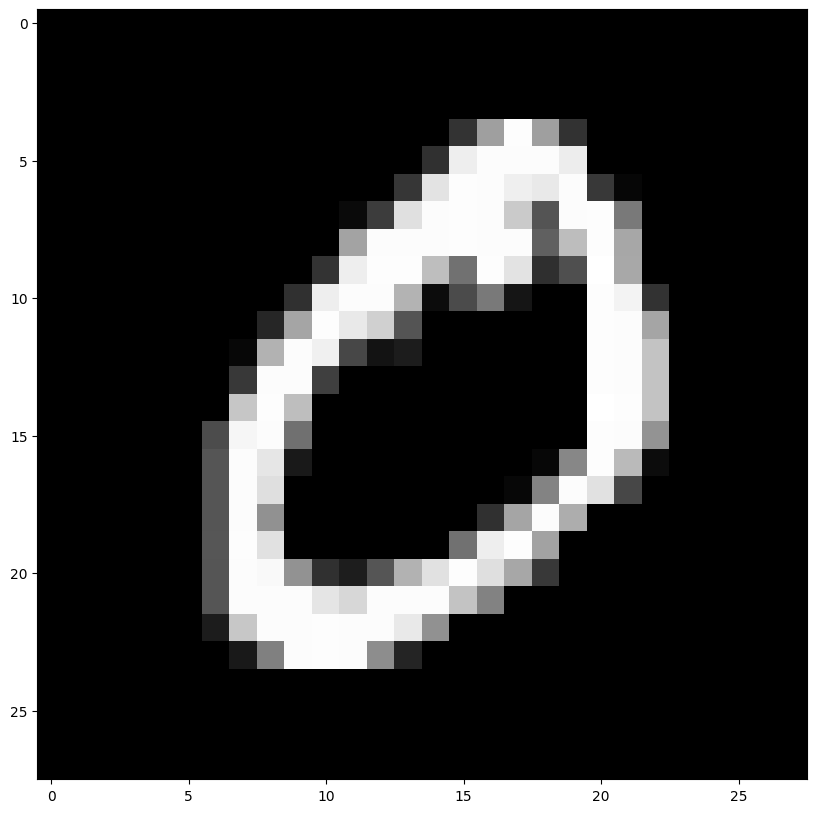

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(x_train[1], cmap='gray');

In [ ]:
# RGB(0-255)  kodları ile renkler görünür hale gelir.
# r:250 g:0 b:250 mor, daha koyu bir mor olur.
# Hepsi 255 olduğunda en parlak halindedir.

In [ ]:
x_train[2].shape

(28, 28)

In [ ]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  62,  81,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 120, 180,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 126, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   2, 153, 210,  40,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 220, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  27, 254, 162,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 222, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 183, 254, 125,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  46, 245, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 198, 254,  56,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 120, 254, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  23, 231, 254,  29,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254, 120,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 163, 254, 216,  16,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  67,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  14,  86, 178, 248, 254,  91,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  85,   0,   0,   0,  47,  49, 116, 144,
        150, 241, 243, 234, 179, 241, 252,  40,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 150, 253, 237, 207, 207, 207, 253, 254, 250, 240,
        198, 143,  91,  28,   5, 233, 250,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 119, 177, 177, 177, 177, 177,  98,  56,   0,
          0,   0,   0,   0, 102, 254, 220,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 137,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255,  94,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  96,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
x_train[2][10,10]

0

In [ ]:
x_train[2][14,10]

49

In [ ]:
x_train[2].mean()

24.799744897959183

In [ ]:
x_train[0].sum()

27525

In [ ]:
x_train[2][14:20,10:15]

array([[ 49, 116, 144, 150, 241],
       [254, 250, 240, 198, 143],
       [ 98,  56,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0]], dtype=uint8)

Veriyi Görselleştirme

In [ ]:
def pixel_visualize(img):
  fig = plt.figure(figsize=(12,12))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')
  width, height = img.shape

  threshold =img.max() /2.5

  for x in range(width):
    for y in range(height):

      ax.annotate(str(round(img[x][y], 2)), xy=(y,x),
                  color = 'white' if img[x][y]<threshold else 'black')

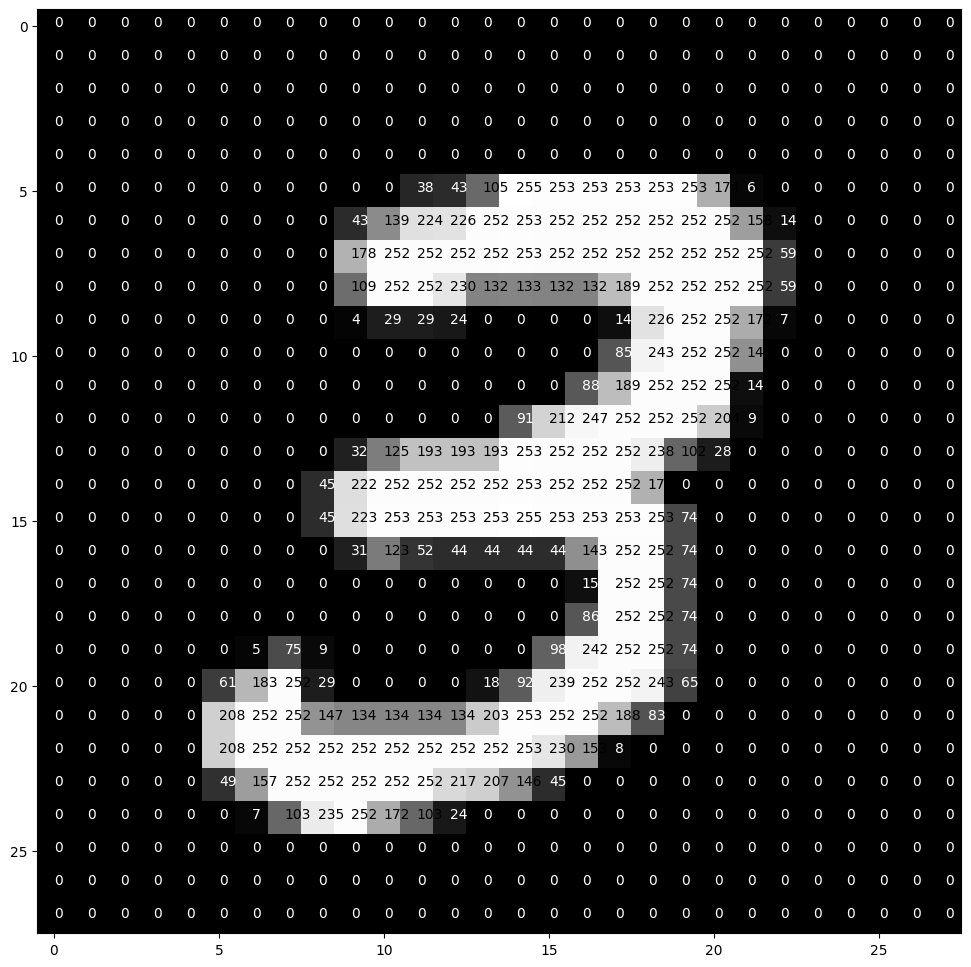

In [ ]:
pixel_visualize(x_train[7])

Data Preparation

Encoding

In [ ]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

Reshaping

In [ ]:
image_size = x_train.shape[1]

In [ ]:
image_size

28

In [ ]:
print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu: {x_test.shape}")

x_train boyutu: (60000, 28, 28)
x_test boyutu: (10000, 28, 28)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu: {x_test.shape}")

x_train boyutu: (60000, 28, 28, 1)
x_test boyutu: (10000, 28, 28, 1)


Standardization

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

Modeling

Sinir Ağı Mimarisini Tanımlamak

In [28]:
model = tf.keras.Sequential( [
    Flatten(input_shape=(28, 28, 1)),
    Dense(units=128, activation="relu", name="layer1"),
    Dense(units=num_labels, activation="softmax", name="output_layer") ])

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0610 - precision: 0.9855 - recall: 0.9794 - accuracy: 0.9823 - val_loss: 0.0793 - val_precision: 0.9812 - val_recall: 0.9744 - val_accuracy: 0.9775
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0504 - precision: 0.9880 - recall: 0.9835 - accuracy: 0.9856 - val_loss: 0.0790 - val_precision: 0.9799 - val_recall: 0.9741 - val_accuracy: 0.9767
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0429 - precision: 0.9896 - recall: 0.9853 - accuracy: 0.9874 - val_loss: 0.0798 - val_precision: 0.9794 - val_recall: 0.9727 - val_accuracy: 0.9752
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0361 - precision: 0.9917 - recall: 0.9881 - accuracy: 0.9899 - val_loss: 0.0784 - val_precision: 0.9801 - val_recall: 0.9749 - val_accuracy: 0.9773
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0308 - precision: 0.9929 - r

Evaluation (Model Başarısını Değerlendirme)

In [32]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0110 - precision: 0.9981 - recall: 0.9976 - accuracy: 0.9979 - val_loss: 0.0748 - val_precision: 0.9803 - val_recall: 0.9774 - val_accuracy: 0.9785
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0098 - precision: 0.9983 - recall: 0.9978 - accuracy: 0.9980 - val_loss: 0.0779 - val_precision: 0.9797 - val_recall: 0.9777 - val_accuracy: 0.9781
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0079 - precision: 0.9986 - recall: 0.9983 - accuracy: 0.9984 - val_loss: 0.0788 - val_precision: 0.9804 - val_recall: 0.9778 - val_accuracy: 0.9785
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0082 - precision: 0.9983 - recall: 0.9980 - accuracy: 0.9981 - val_loss: 0.0887 - val_precision: 0.9779 - val_recall: 0.9758 - val_accuracy: 0.9765
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0066 - precision: 0.9990 - r

Acuuracy ve Loss Grafikleri

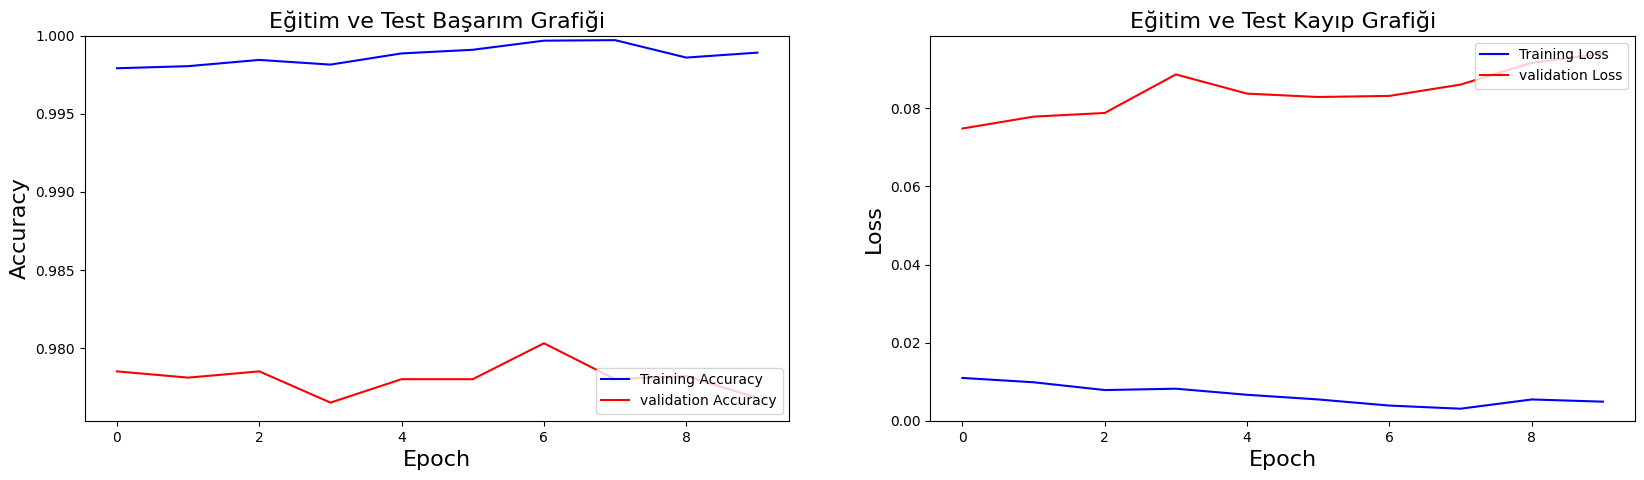

In [38]:
#Accuracy Grafiği
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], color='b', label="Training Accuracy")
plt.plot(history.history["val_accuracy"], color='r', label="validation Accuracy")
plt.legend(loc='lower right')
plt.xlabel("Epoch", fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Eğitim ve Test Başarım Grafiği', fontsize=16)
plt.show

#Loss Grafiği

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], color='b', label="Training Loss")
plt.plot(history.history["val_loss"], color='r', label="validation Loss")
plt.legend(loc='upper right')
plt.xlabel("Epoch", fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0, max(plt.ylim())])
plt.title('Eğitim ve Test Kayıp Grafiği', fontsize=16)
plt.show()

In [39]:
loss, precision, recall, acc= model.evaluate(x_test, y_test, verbose=False)
print("\nTest Accuracy: %.1f%%" % (100.0 * acc))
print("\nTest Loss: %.1f%%" % (100.0 * loss))
print("\nTest Precision: %.1f%%" % (100.0 * precision))
print("\nTest Recall: %.1f%%" % (100.0 * recall))


Test Accuracy: 97.7%

Test Loss: 9.4%

Test Precision: 97.8%

Test Recall: 97.6%


Modelin Kaydedilmesi ve Tahmin için Kullanılması

In [40]:
model.save("mnist_model.h5")

In [41]:
import random

random = random.randint(0, x_test.shape[0])

In [42]:
random

5980

In [43]:
test_image = x_test[random]

In [45]:
y_test[random]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

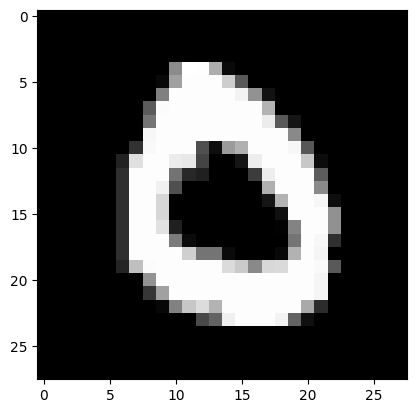

In [47]:
plt.imshow(test_image.reshape(28, 28),cmap='gray');

In [48]:
test_data = x_test[random].reshape(1, 28, 28, 1)


In [49]:
probability = model.predict(test_data)

1/1 [==============================] - 0s 181ms/step


In [50]:
probability

array([[9.9999976e-01, 4.3800725e-16, 2.1928401e-12, 1.4612273e-10,
        8.5271885e-17, 4.2892107e-10, 1.1160237e-10, 9.9452564e-12,
        3.8833953e-12, 2.2132716e-07]], dtype=float32)

In [51]:
predicted_classes = np.argmax(probability)

In [52]:
predicted_classes

0

In [53]:
print(f"Tahmin edilen sınıf: {predicted_classes} \n ")
print(f"Tahmin edilen sınıfın olasılık değeri : {(np.max(probability, axis=-1))[0]} \n")
print(f"Diğer Sınıfların Olasılık Değerleri \n{probability}")

Tahmin edilen sınıf: 0 
 
Tahmin edilen sınıfın olasılık değeri : 0.9999997615814209 

Diğer Sınıfların Olasılık Değerleri 
[[9.9999976e-01 4.3800725e-16 2.1928401e-12 1.4612273e-10 8.5271885e-17
  4.2892107e-10 1.1160237e-10 9.9452564e-12 3.8833953e-12 2.2132716e-07]]
